# From JUL 21 2020 only

In [21]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [5]:
glider_filename = "cp_514-20200613T2130-delayed_3c7a_cd08_61eb.csv"
glider_data = pd.read_csv(glider_filename)

In [55]:
ibuoy_filename = "ooi-cp03issm-rid27-02-flortd000_ceeb_2bdc_d098.csv"
cbuoy_filename = "ooi-cp01cnsm-rid27-02-flortd000_afd5_d615_3e8c.csv"
obuoy_filename = "ooi-cp04ossm-rid27-02-flortd000_4584_01fb_5e10.csv"

ibuoy_data = pd.read_csv(ibuoy_filename, skiprows=[1])
cbuoy_data = pd.read_csv(cbuoy_filename, skiprows=[1])
obuoy_data = pd.read_csv(obuoy_filename, skiprows=[1])


In [28]:
glider_data

,time (UTC),latitude (degrees_north),longitude (degrees_east),depth (m),chlorophyll (ug l-1)
0,2020-07-21T00:55:03Z,39.937544,-70.509564,6.003600,0.2982
1,2020-07-21T00:55:03Z,39.937544,-70.509564,NaN,NaN
2,2020-07-21T00:55:03Z,39.937544,-70.509564,NaN,0.3550
3,2020-07-21T00:55:03Z,39.937544,-70.509564,NaN,0.3621
4,2020-07-21T00:55:03Z,39.937544,-70.509564,NaN,0.3550
...,...,...,...,...,...
222889,2020-07-23T23:42:43Z,40.065038,-71.166771,NaN,NaN
222890,2020-07-23T23:42:43Z,40.065038,-71.166771,15.390518,1.3703
222891,2020-07-23T23:42:43Z,40.065038,-71.166771,NaN,1.3490
222892,2020-07-23T23:42:43Z,40.065038,-71.166771,15.241679,1.3064


In [33]:
glider_data.columns

Index(['time (UTC)', 'latitude (degrees_north)', 'longitude (degrees_east)',
       'depth (m)', 'chlorophyll (ug l-1)'],
      dtype='object')

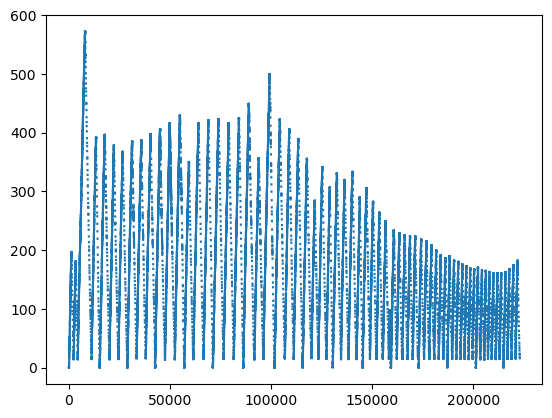

In [32]:
plt.plot(glider_data['depth (m)'])

In [25]:
ibuoy_data

,time,mass_concentration_of_chlorophyll_a_in_sea_water,z
0,2014-12-14T19:00:00Z,0.999336,0.0
1,2014-12-14T19:01:00Z,1.033066,0.0
2,2014-12-14T19:02:00Z,1.081466,0.0
3,2014-12-14T19:03:00Z,0.919600,0.0
4,2014-12-14T19:15:00Z,0.965695,0.0
...,...,...,...
912749,2022-11-13T10:48:00Z,0.832300,0.0
912750,2022-11-13T11:00:00Z,0.845318,0.0
912751,2022-11-13T11:01:00Z,0.858215,0.0
912752,2022-11-13T11:02:00Z,0.845219,0.0


In [27]:
modis_data = xr.open_dataset('aqua_modis/AQUA_MODIS.20150111.L3m.DAY.CHL.x_chlor_a.nc')
modis_data

<xarray.Dataset>
Dimensions:  (lat: 12, lon: 3, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 40.38 40.34 40.3 40.25 ... 40.05 40.0 39.96 39.92
  * lon      (lon) float32 -70.87 -70.83 -70.78
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    chlor_a  (lat, lon) float32 ...
    palette  (rgb, eightbitcolor) uint8 ...
Attributes: (12/61)
    product_name:                     AQUA_MODIS.20150111.L3m.DAY.CHL.x_chlor...
    instrument:                       MODIS
    title:                            MODISA Level-3 Equidistant Cylindrical ...
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    source:                           satellite observations from MODIS-Aqua
    ...                               ...
    processing_level:                 L3 Mapped
    cdm_data_type:                    grid
    proj4_string:                     +proj=eqc +lat_ts=0 +lat_0=0 +x_0=0 +y_...
    data_bins:                        36
    data_minimum:                     0.63226265
    data_maximum:                     0.85580045

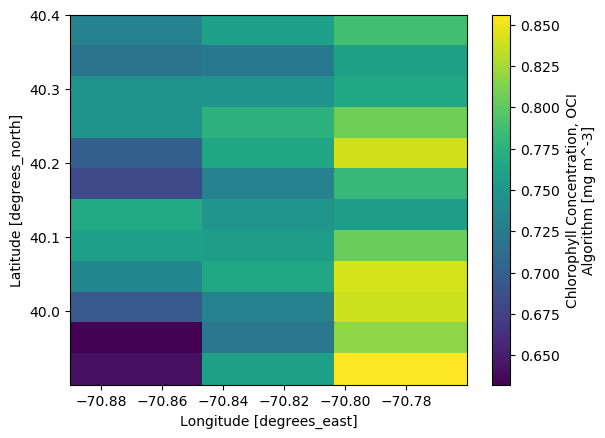

In [22]:
plt.figure()
modis_data.chlor_a.plot()

+ Inshore Surface Mooring 
   + 40.3619, -70.8783 - corresponds to 1,0
+ Coastal Pioneer: Central Surface Mooring
   + 40.1334, -70.7785 - corresponds to 6,2
+ Coastal Pioneer: Offshore Surface Mooring
   + 39.9371, -70.887 - corresponds to 10,0

In [56]:
ibuoy_idx = (1,0)
cbuoy_idx = (6,2)
obuoy_idx = (10,0)

In [57]:
# Indexing into data - upper left corner is 0,0, in row, col order
float(modis_data.chlor_a[ibuoy_idx])

0.7180849313735962

In [59]:
float(modis_data.chlor_a[cbuoy_idx])

0.7557186484336853

In [60]:
float(modis_data.chlor_a[obuoy_idx])

0.632262647151947